In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col 
from linearmodels.iv import IV2SLS

In [7]:
df1= pd.read_stata('/Users/apple/Desktop/maketable1.dta')

In [8]:
df1.head()

,shortnam,euro1900,excolony,avexpr,logpgp95,cons1,cons90,democ00a,cons00a,extmort4,logem4,loghjypl,baseco
0,AFG,0.000000,1.0,NaN,NaN,1.0,2.0,1.0,1.0,93.699997,4.540098,NaN,NaN
1,AGO,8.000000,1.0,5.363636,7.770645,3.0,3.0,0.0,1.0,280.000000,5.634789,-3.411248,1.0
2,ARE,0.000000,1.0,7.181818,9.804219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ARG,60.000004,1.0,6.386364,9.133459,1.0,6.0,3.0,3.0,68.900002,4.232656,-0.872274,1.0
4,ARM,0.000000,0.0,NaN,7.682482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df1.isnull().sum()

shortnam     0
euro1900     9
excolony     1
avexpr      42
logpgp95    15
cons1       75
cons90      75
democ00a    76
cons00a     72
extmort4    76
logem4      76
loghjypl    40
baseco      99
dtype: int64

In [10]:
df1.describe()

,euro1900,excolony,avexpr,logpgp95,cons1,cons90,democ00a,cons00a,extmort4,logem4,loghjypl,baseco
count,154.000000,162.000000,121.000000,148.000000,88.000000,88.000000,87.000000,91.000000,87.000000,87.000000,123.000000,64.0
mean,30.466232,0.666667,7.066491,8.302509,3.590909,3.636364,1.149425,1.857143,220.926437,4.595984,-1.731106,1.0
std,42.389862,0.472866,1.804287,1.105342,2.414689,2.339967,2.576859,1.823132,411.498230,1.303334,1.083726,0.0
min,0.000000,0.000000,1.636364,6.109248,1.000000,1.000000,0.000000,1.000000,2.550000,0.936093,-3.540459,1.0
25%,0.000000,0.000000,5.886364,7.376192,1.000000,1.750000,0.000000,1.000000,68.350006,4.224609,-2.741120,1.0
50%,1.950000,1.000000,7.045455,8.265764,3.000000,3.000000,0.000000,1.000000,85.000000,4.442651,-1.560648,1.0
75%,91.625000,1.000000,8.272727,9.216228,7.000000,7.000000,1.000000,1.000000,253.259995,5.610119,-0.831277,1.0
max,100.000000,1.000000,10.000000,10.288750,7.000000,7.000000,10.000000,7.000000,2940.000000,7.986165,0.000000,1.0


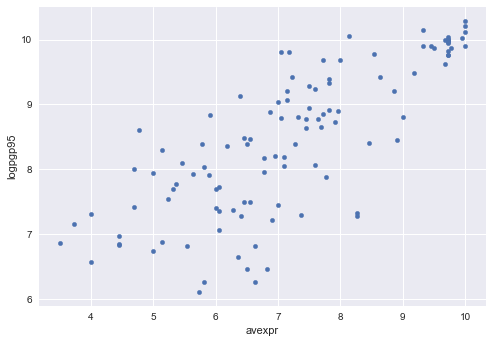

In [12]:
plt.style.use('seaborn')
df1.plot(x='avexpr',y='logpgp95',kind='scatter')
plt.show()

The plot shows a fairly strong positive relationship between protection against expropriation and log GDP per capita.


## LM

In [16]:
lm_sub=df1.dropna(subset=['avexpr','logpgp95'])

In [18]:
lm_sub.isnull().sum()
# maintain the same dataframe, only drop the null value from 'avexpr','logpgp95' columns

shortnam     0
euro1900     2
excolony     1
avexpr       0
logpgp95     0
cons1       45
cons90      45
democ00a    46
cons00a     44
extmort4    41
logem4      41
loghjypl     9
baseco      47
dtype: int64

In [31]:
lm_sub = lm_sub[lm_sub['baseco'] == 1]
X = lm_sub['avexpr']
y = lm_sub['logpgp95']
labels = lm_sub['shortnam']

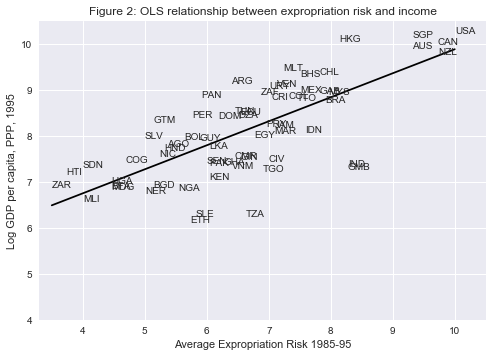

In [32]:
# Replace markers with country labels
fig, ax = plt.subplots() 
ax.scatter(X, y, marker='')

for i, label in enumerate(labels): 
    ax.annotate(label, (X.iloc[i], y.iloc[i]))
        # Fit a linear trend line
ax.plot(np.unique(X),np.poly1d(np.polyfit(X, y, 1))(np.unique(X)), color='black')
ax.set_xlim([3.3,10.5])
ax.set_ylim([4,10.5])
ax.set_xlabel('Average Expropriation Risk 1985-95') 
ax.set_ylabel('Log GDP per capita, PPP, 1995') 
ax.set_title('Figure 2: OLS relationship between expropriation risk and income') 
plt.show()

In [33]:
df1['const'] = 1

In [36]:
reg1 = sm.OLS(endog=df1['logpgp95'], exog=df1[['const', 'avexpr']],missing='drop')
# missing='drop'

In [37]:
result=reg1.fit()

In [38]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               logpgp95   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     171.4
Date:                Mon, 15 Jun 2020   Prob (F-statistic):           4.16e-24
Time:                        12:33:57   Log-Likelihood:                -119.71
No. Observations:                 111   AIC:                             243.4
Df Residuals:                     109   BIC:                             248.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6261      0.301     15.391      0.0

The R-squared value of 0.611 indicates that around 61% of variation in log GDP per
capita is explained by protection against expropriation.

In [39]:
result.predict(exog=[1,5])

array([7.28544615])

## Graph the predicted lm line

In [40]:
df1_plot=df1.dropna(subset=['logpgp95', 'avexpr'])

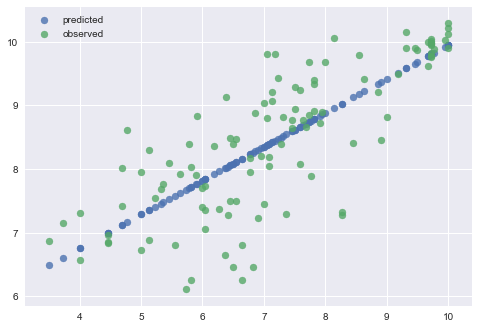

In [44]:

fix, ax = plt.subplots()
ax.scatter(df1_plot['avexpr'], result.predict(), alpha=0.8,
label='predicted')
# predict value
ax.scatter(df1_plot['avexpr'], df1_plot['logpgp95'], alpha=0.8, label='observed')
ax.legend()

In [45]:
df2= pd.read_stata('/Users/apple/Desktop/maketable2.dta')

In [46]:
df2.describe()

,africa,lat_abst,avexpr,logpgp95,other,asia,loghjypl,baseco
count,163.000000,162.000000,121.000000,148.000000,163.000000,163.000000,123.000000,64.0
mean,0.306748,0.295550,7.066491,8.302509,0.024540,0.257669,-1.731106,1.0
std,0.462565,0.190379,1.804287,1.105342,0.155195,0.438698,1.083726,0.0
min,0.000000,0.000000,1.636364,6.109248,0.000000,0.000000,-3.540459,1.0
25%,0.000000,0.144444,5.886364,7.376192,0.000000,0.000000,-2.741120,1.0
50%,0.000000,0.266667,7.045455,8.265764,0.000000,0.000000,-1.560648,1.0
75%,1.000000,0.446944,8.272727,9.216228,0.000000,1.000000,-0.831277,1.0
max,1.000000,0.722222,10.000000,10.288750,1.000000,1.000000,0.000000,1.0


In [47]:
df2['const']=1
X1=['const','avexpr']
X2=['const','avexpr','lat_abst']
X3=['const','avexpr','lat_abst','asia','africa','other']

In [49]:
reg1=sm.OLS(df2['logpgp95'],df2[X1],missing='drop').fit()
reg2=sm.OLS(df2['logpgp95'],df2[X2],missing='drop').fit()
reg3=sm.OLS(df2['logpgp95'],df2[X3],missing='drop').fit()

In [54]:
info_dict={'R-squared' : lambda x: f"{x.rsquared:.2f}",
'No. observations' : lambda x: f"{int(x.nobs):d}"}
results_table = summary_col(results=[reg1,reg2,reg3], float_format='%0.2f',stars = True, model_names=['Model 1',
'Model 3','Model 4'],info_dict=info_dict,regressor_order=['const', 'avexpr',
                                                      'lat_abst',
                                                      'asia',
                                                      'africa'])
results_table.add_title('Table 2 - OLS Regressions')

In [55]:
print(results_table)

        Table 2 - OLS Regressions
                 Model 1 Model 3 Model 4 
-----------------------------------------
const            4.63*** 4.87*** 5.85*** 
                 (0.30)  (0.33)  (0.34)  
avexpr           0.53*** 0.46*** 0.39*** 
                 (0.04)  (0.06)  (0.05)  
lat_abst                 0.87*   0.33    
                         (0.49)  (0.45)  
asia                             -0.15   
                                 (0.15)  
africa                           -0.92***
                                 (0.17)  
R-squared        0.61    0.62    0.70    
                 0.61    0.62    0.72    
other                            0.30    
                                 (0.37)  
R-squared        0.61    0.62    0.72    
No. observations 111     111     111     
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


## two-stage least squares (2SLS)

First stage:

           𝑎𝑣𝑒𝑥𝑝𝑟𝑖 = 𝛿0 + 𝛿1𝑙𝑜𝑔𝑒𝑚4𝑖 + 𝑣𝑖

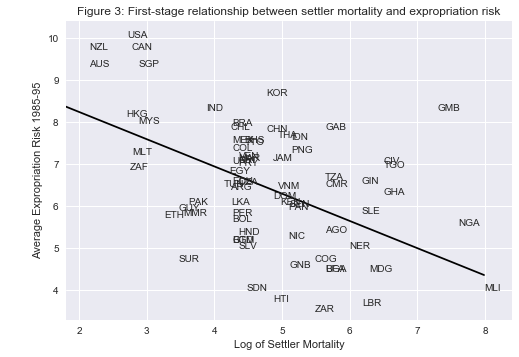

In [59]:
# Dropping NA's is required to use numpy's polyfit df1_subset2 = df1.dropna(subset=['logem4', 'avexpr'])
df1_subset2 = df1.dropna(subset=['logem4', 'avexpr'])
X = df1_subset2['logem4']
y = df1_subset2['avexpr']
labels = df1_subset2['shortnam']
         # Replace markers with country labels
fig, ax = plt.subplots() 
ax.scatter(X, y, marker='')
for i, label in enumerate(labels): 
    ax.annotate(label, (X.iloc[i], y.iloc[i]))
         # Fit a linear trend line
ax.plot(np.unique(X),
np.poly1d(np.polyfit(X, y, 1))(np.unique(X)), color='black')
ax.set_xlim([1.8,8.4]) 
ax.set_ylim([3.3,10.4])
ax.set_xlabel('Log of Settler Mortality')
ax.set_ylabel('Average Expropriation Risk 1985-95') 
ax.set_title('Figure 3: First-stage relationship between settler mortality and expropriation risk')
plt.show()

In [67]:
df4= pd.read_stata('/Users/apple/Desktop/maketable4.dta')

In [68]:
df4 = df4[df4['baseco'] == 1]
df4['const'] = 1

In [70]:
results_fs = sm.OLS(df4['avexpr'], df4[['const', 'logem4']],missing='drop').fit() 
print(results_fs.summary())

                            OLS Regression Results                            
Dep. Variable:                 avexpr   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     22.95
Date:                Mon, 15 Jun 2020   Prob (F-statistic):           1.08e-05
Time:                        12:58:39   Log-Likelihood:                -104.83
No. Observations:                  64   AIC:                             213.7
Df Residuals:                      62   BIC:                             218.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3414      0.611     15.296      0.0

## Second stage

We need to retrieve the predicted values of 𝑎𝑣𝑒𝑥𝑝𝑟𝑖 using .predict():
                
                𝑙𝑜𝑔𝑝𝑔𝑝95𝑖 = 𝛽0 + 𝛽1𝑎𝑣̂𝑒𝑥𝑝𝑟𝑖 + 𝑢𝑖

In [71]:
df4['predicted_avexpr'] = results_fs.predict()

In [76]:
result_ss=sm.OLS(df4['logpgp95'],df4[['const','predicted_avexpr']],missing='drop').fit()

In [77]:
print(result_ss.summary())

                            OLS Regression Results                            
Dep. Variable:               logpgp95   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     56.60
Date:                Mon, 15 Jun 2020   Prob (F-statistic):           2.66e-10
Time:                        13:01:54   Log-Likelihood:                -72.268
No. Observations:                  64   AIC:                             148.5
Df Residuals:                      62   BIC:                             152.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.9097      0.823  

# two stages equals to

In [80]:
iv=IV2SLS(dependent=df4['logpgp95'],
         exog=df4['const'],
         endog=df4['avexpr'],
         instruments=df4['logem4']).fit(cov_type='unadjusted')

In [81]:
print(iv.summary)

                          IV-2SLS Estimation Summary                          
Dep. Variable:               logpgp95   R-squared:                      0.1870
Estimator:                    IV-2SLS   Adj. R-squared:                 0.1739
No. Observations:                  64   F-statistic:                    37.568
Date:                Mon, Jun 15 2020   P-value (F-stat)                0.0000
Time:                        13:04:14   Distribution:                  chi2(1)
Cov. Estimator:            unadjusted                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
const          1.9097     1.0106     1.8897     0.0588     -0.0710      3.8903
avexpr         0.9443     0.1541     6.1293     0.00

## Hausman test

We want to test for correlation between the endogenous variable, 𝑎𝑣𝑒𝑥𝑝𝑟𝑖, and the errors, 𝑢𝑖 

𝐻0 ∶ 𝐶𝑜𝑣(𝑎𝑣𝑒𝑥𝑝𝑟𝑖, 𝑢𝑖) = 0 (𝑛𝑜 𝑒𝑛𝑑𝑜𝑔𝑒𝑛𝑒𝑖𝑡𝑦)

𝐻1 ∶ 𝐶𝑜𝑣(𝑎𝑣𝑒𝑥𝑝𝑟𝑖, 𝑢𝑖) ≠ 0 (𝑒𝑛𝑑𝑜𝑔𝑒𝑛𝑒𝑖𝑡𝑦)

In [83]:
reg1 = sm.OLS(endog=df4['avexpr'], exog=df4[['const', 'logem4']],
missing='drop').fit()

In [84]:
df4['error']=reg1.resid

In [86]:
reg2=sm.OLS(endog=df4['logpgp95'],
           exog=df4[['const','avexpr','error']],
           missing='drop').fit()

In [89]:
print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:               logpgp95   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     62.15
Date:                Mon, 15 Jun 2020   Prob (F-statistic):           1.91e-15
Time:                        13:10:35   Log-Likelihood:                -57.468
No. Observations:                  64   AIC:                             120.9
Df Residuals:                      61   BIC:                             127.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9097      0.659      2.899      0.0

The output shows that the coefficient on the residuals is statistically significant, indicating 𝑎𝑣𝑒𝑥𝑝𝑟𝑖 is endogenous.